## Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


## Load the dataset

In [134]:
data = pd.read_csv("bitcoin_ticker.csv")
data2 = pd.read_csv('input/btceUSD_1-min_data_2012-01-01_to_2017-05-31.csv')

In [135]:
df = data2
data2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325292180,4.247,4.247,4.247,4.247,0.4,1.6988,4.247
1,1325292240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325292300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325292360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325292420,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()
#df['datetime'] = pd.to_datetime(df['Timestamp'],unit='s')
#df.index = df.datetime
#df = df.resample('M').mean()
#df = df.loc[df.index > pd.to_datetime('2017-06-28 00:00:00')]

In [138]:
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.439149,4.447614,4.437737,4.444623,10.797146,47.337181,4.444100
2012-01-01,5.049322,5.054658,5.043826,5.049161,7.953953,39.796498,5.049446
2012-01-02,5.190137,5.192603,5.184397,5.186099,3.208246,16.609636,5.188622
2012-01-03,4.938149,4.943091,4.934802,4.940562,7.794346,37.942367,4.940613
2012-01-04,5.216841,5.225966,5.214017,5.222636,5.821127,30.294113,5.220669
2012-01-05,6.148018,6.154207,6.141776,6.147966,10.262877,63.695786,6.148598
2012-01-06,6.501766,6.504931,6.495495,6.498690,11.708150,76.038783,6.499527
2012-01-07,6.333096,6.345689,6.329230,6.341815,3.235155,20.380006,6.336590
2012-01-08,6.499654,6.502419,6.498176,6.501309,14.749955,96.640747,6.500991


### we require only the last value, so we subset that and convert it to numpy array

In [139]:
df_days = df[['Weighted_Price']]

In [140]:
dataset = df_days.values
dataset = dataset.astype('float32')

In [141]:
len(dataset)

1979

Neural networks are sensitive to input data, especiallly when we are using activation functions like sigmoid or tanh activation functions are used. ISo we rescale our data to the range of 0-to-1, using MinMaxScaler

In [142]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [143]:
dataset

array([[1.4524814e-04],
       [3.8626464e-04],
       [4.4167740e-04],
       ...,
       [8.5276586e-01],
       [8.8118577e-01],
       [8.5017323e-01]], dtype=float32)

In [144]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

1325 654


Now let us define the function called create_dataset, which take two inputs, 

1. Dataset - numpy array that we want to convert into a dataset
2. look_back - number of previous time steps to use as input variables to predict the next time period


In [145]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [146]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [147]:
trainX

array([[0.00014525, 0.00038626, 0.00044168, ..., 0.00089874, 0.00096419,
        0.00096427],
       [0.00038626, 0.00044168, 0.00034293, ..., 0.00096419, 0.00096427,
        0.00089631],
       [0.00044168, 0.00034293, 0.00045444, ..., 0.00096427, 0.00089631,
        0.00096324],
       ...,
       [0.10971464, 0.10985798, 0.10940082, ..., 0.10188423, 0.10234254,
        0.10335738],
       [0.10985798, 0.10940082, 0.1083044 , ..., 0.10234254, 0.10335738,
        0.10199335],
       [0.10940082, 0.1083044 , 0.1074056 , ..., 0.10335738, 0.10199335,
        0.10269024]], dtype=float32)

In [148]:
trainY

array([0.00089631, 0.00096324, 0.00095275, ..., 0.10199335, 0.10269024,
       0.10222775], dtype=float32)

In [149]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Build our Model

In [133]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=256, verbose=2)

Epoch 1/1000
 - 1s - loss: 0.0450
Epoch 2/1000
 - 0s - loss: 0.0439
Epoch 3/1000
 - 0s - loss: 0.0430
Epoch 4/1000
 - 0s - loss: 0.0420
Epoch 5/1000
 - 0s - loss: 0.0410
Epoch 6/1000
 - 0s - loss: 0.0400
Epoch 7/1000
 - 0s - loss: 0.0390
Epoch 8/1000
 - 0s - loss: 0.0381
Epoch 9/1000
 - 0s - loss: 0.0371
Epoch 10/1000
 - 0s - loss: 0.0362
Epoch 11/1000
 - 0s - loss: 0.0353
Epoch 12/1000
 - 0s - loss: 0.0344
Epoch 13/1000
 - 0s - loss: 0.0336
Epoch 14/1000
 - 0s - loss: 0.0327
Epoch 15/1000
 - 0s - loss: 0.0319
Epoch 16/1000
 - 0s - loss: 0.0310
Epoch 17/1000
 - 0s - loss: 0.0302
Epoch 18/1000
 - 0s - loss: 0.0295
Epoch 19/1000
 - 0s - loss: 0.0287
Epoch 20/1000
 - 0s - loss: 0.0279
Epoch 21/1000
 - 0s - loss: 0.0272
Epoch 22/1000
 - 0s - loss: 0.0265
Epoch 23/1000
 - 0s - loss: 0.0258
Epoch 24/1000
 - 0s - loss: 0.0251
Epoch 25/1000
 - 0s - loss: 0.0245
Epoch 26/1000
 - 0s - loss: 0.0238
Epoch 27/1000
 - 0s - loss: 0.0232
Epoch 28/1000
 - 0s - loss: 0.0226
Epoch 29/1000
 - 0s - loss: 0

Epoch 232/1000
 - 0s - loss: 0.0069
Epoch 233/1000
 - 0s - loss: 0.0069
Epoch 234/1000
 - 0s - loss: 0.0069
Epoch 235/1000
 - 0s - loss: 0.0069
Epoch 236/1000
 - 0s - loss: 0.0069
Epoch 237/1000
 - 0s - loss: 0.0069
Epoch 238/1000
 - 0s - loss: 0.0069
Epoch 239/1000
 - 0s - loss: 0.0068
Epoch 240/1000
 - 0s - loss: 0.0068
Epoch 241/1000
 - 0s - loss: 0.0068
Epoch 242/1000
 - 0s - loss: 0.0068
Epoch 243/1000
 - 0s - loss: 0.0068
Epoch 244/1000
 - 0s - loss: 0.0068
Epoch 245/1000
 - 0s - loss: 0.0068
Epoch 246/1000
 - 0s - loss: 0.0067
Epoch 247/1000
 - 0s - loss: 0.0067
Epoch 248/1000
 - 0s - loss: 0.0067
Epoch 249/1000
 - 0s - loss: 0.0067
Epoch 250/1000
 - 0s - loss: 0.0067
Epoch 251/1000
 - 0s - loss: 0.0067
Epoch 252/1000
 - 0s - loss: 0.0067
Epoch 253/1000
 - 0s - loss: 0.0067
Epoch 254/1000
 - 0s - loss: 0.0066
Epoch 255/1000
 - 0s - loss: 0.0066
Epoch 256/1000
 - 0s - loss: 0.0066
Epoch 257/1000
 - 0s - loss: 0.0066
Epoch 258/1000
 - 0s - loss: 0.0066
Epoch 259/1000
 - 0s - loss:

Epoch 460/1000
 - 0s - loss: 0.0050
Epoch 461/1000
 - 0s - loss: 0.0050
Epoch 462/1000
 - 0s - loss: 0.0049
Epoch 463/1000
 - 0s - loss: 0.0049
Epoch 464/1000
 - 0s - loss: 0.0049
Epoch 465/1000
 - 0s - loss: 0.0049
Epoch 466/1000
 - 0s - loss: 0.0049
Epoch 467/1000
 - 0s - loss: 0.0049
Epoch 468/1000
 - 0s - loss: 0.0049
Epoch 469/1000
 - 0s - loss: 0.0049
Epoch 470/1000
 - 0s - loss: 0.0049
Epoch 471/1000
 - 0s - loss: 0.0049
Epoch 472/1000
 - 0s - loss: 0.0049
Epoch 473/1000
 - 0s - loss: 0.0049
Epoch 474/1000
 - 0s - loss: 0.0049
Epoch 475/1000
 - 0s - loss: 0.0049
Epoch 476/1000
 - 0s - loss: 0.0049
Epoch 477/1000
 - 0s - loss: 0.0049
Epoch 478/1000
 - 0s - loss: 0.0049
Epoch 479/1000
 - 0s - loss: 0.0049
Epoch 480/1000
 - 0s - loss: 0.0049
Epoch 481/1000
 - 0s - loss: 0.0048
Epoch 482/1000
 - 0s - loss: 0.0048
Epoch 483/1000
 - 0s - loss: 0.0048
Epoch 484/1000
 - 0s - loss: 0.0048
Epoch 485/1000
 - 0s - loss: 0.0048
Epoch 486/1000
 - 0s - loss: 0.0048
Epoch 487/1000
 - 0s - loss:

Epoch 688/1000
 - 0s - loss: 0.0039
Epoch 689/1000
 - 0s - loss: 0.0039
Epoch 690/1000
 - 0s - loss: 0.0039
Epoch 691/1000
 - 0s - loss: 0.0039
Epoch 692/1000
 - 0s - loss: 0.0039
Epoch 693/1000
 - 0s - loss: 0.0039
Epoch 694/1000
 - 0s - loss: 0.0039
Epoch 695/1000
 - 0s - loss: 0.0038
Epoch 696/1000
 - 0s - loss: 0.0038
Epoch 697/1000
 - 0s - loss: 0.0038
Epoch 698/1000
 - 0s - loss: 0.0038
Epoch 699/1000
 - 0s - loss: 0.0038
Epoch 700/1000
 - 0s - loss: 0.0038
Epoch 701/1000
 - 0s - loss: 0.0038
Epoch 702/1000
 - 0s - loss: 0.0038
Epoch 703/1000
 - 0s - loss: 0.0038
Epoch 704/1000
 - 0s - loss: 0.0038
Epoch 705/1000
 - 0s - loss: 0.0038
Epoch 706/1000
 - 0s - loss: 0.0038
Epoch 707/1000
 - 0s - loss: 0.0038
Epoch 708/1000
 - 0s - loss: 0.0038
Epoch 709/1000
 - 0s - loss: 0.0038
Epoch 710/1000
 - 0s - loss: 0.0038
Epoch 711/1000
 - 0s - loss: 0.0038
Epoch 712/1000
 - 0s - loss: 0.0038
Epoch 713/1000
 - 0s - loss: 0.0038
Epoch 714/1000
 - 0s - loss: 0.0038
Epoch 715/1000
 - 0s - loss:

Epoch 916/1000
 - 0s - loss: 0.0030
Epoch 917/1000
 - 0s - loss: 0.0030
Epoch 918/1000
 - 0s - loss: 0.0030
Epoch 919/1000
 - 0s - loss: 0.0030
Epoch 920/1000
 - 0s - loss: 0.0030
Epoch 921/1000
 - 0s - loss: 0.0030
Epoch 922/1000
 - 0s - loss: 0.0030
Epoch 923/1000
 - 0s - loss: 0.0030
Epoch 924/1000
 - 0s - loss: 0.0030
Epoch 925/1000
 - 0s - loss: 0.0030
Epoch 926/1000
 - 0s - loss: 0.0030
Epoch 927/1000
 - 0s - loss: 0.0030
Epoch 928/1000
 - 0s - loss: 0.0030
Epoch 929/1000
 - 0s - loss: 0.0030
Epoch 930/1000
 - 0s - loss: 0.0030
Epoch 931/1000
 - 0s - loss: 0.0029
Epoch 932/1000
 - 0s - loss: 0.0029
Epoch 933/1000
 - 0s - loss: 0.0029
Epoch 934/1000
 - 0s - loss: 0.0029
Epoch 935/1000
 - 0s - loss: 0.0029
Epoch 936/1000
 - 0s - loss: 0.0029
Epoch 937/1000
 - 0s - loss: 0.0029
Epoch 938/1000
 - 0s - loss: 0.0029
Epoch 939/1000
 - 0s - loss: 0.0029
Epoch 940/1000
 - 0s - loss: 0.0029
Epoch 941/1000
 - 0s - loss: 0.0029
Epoch 942/1000
 - 0s - loss: 0.0029
Epoch 943/1000
 - 0s - loss:

In [93]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

We have to invert the predictions before calculating error to so that reports will be in same units as our original data

In [94]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [95]:

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 182.68 RMSE
Test Score: 374.14 RMSE


In [96]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
 

In [97]:
 # shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
 


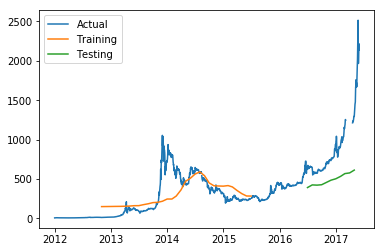

In [101]:
plt.plot(df['Weighted_Price'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["Weighted_price"], index=df_month2.index).Weighted_price, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["Weighted_price"], index=df_month2.index).Weighted_price, label='Testing')
plt.legend(loc='best')
plt.show()